## Análisis de velocidad y aceleración de mecanismo Manivela-balancín

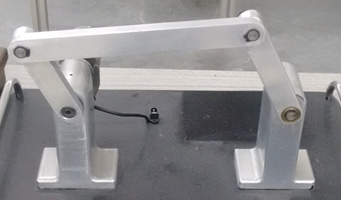

## Análisis vectorial

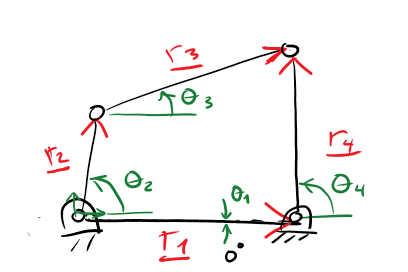

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{4}}-\overrightarrow{r_{1}}=0$ (1)

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})-r1\cdot cos(\theta_{1})=0$, (2)

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})-r1\cdot sin(\theta_{1})=0$ (3)

En este cuaderno desarrollaremos el análisis de velocidad y aceleración. Para esto debemos contar con el análisis de posición correctamente desarrollado.

Para ver este desarrollo con las anotaciones correspondientes:

### [Análisis Cinemático de Mecanismo Manivela Balancín](https://github.com/luismiguelaristi/MecanismosPythonUPB/blob/main/01b_ManivelaBalancin/Manivela%20Balancin_MetodosNumericos.ipynb)

In [37]:
%reset -sf

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def manivela_balancin(x0, params):
    th2 = params[0]
    ## parámetros
    r2 = params[1]
    r3 = params[2]
    r4 = params[3]
    r1 = params[4]
    th1 = params[5]
    # var secundarias
    th3 = x0[0]
    th4 = x0[1]

    return [r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1*np.cos(th1),
            r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1*np.sin(th1)]

# Parámetros
r2 = 60
r3 = 150
r4 = 100 
r1 = 160 
th1 = 0
# Declaramos las condiciones iniciales
th2 = np.deg2rad(69)
varEntrada = th2

params = [varEntrada,r2,r3,r4,r1,th1]

th3 = np.deg2rad(17)
th4 = np.deg2rad(87)

x0 = np.array([th3,th4])

numpos = 360

th2v = np.linspace(0,2*np.pi,numpos)
th3v = np.zeros(numpos)
th4v = np.zeros(numpos)
exitflagV = np.zeros(numpos)

for i in range(0,numpos):
    params[0] = th2v[i]
    q,info,exitflagV[i],mensaje = fsolve(manivela_balancin,
                                        x0, 
                                        args = params,
                                        full_output = True)
    th3v[i] = q[0]
    th4v[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))
    
# plt.figure()
# plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
# plt.legend(["$\Theta_3$"])
# plt.xlabel("$\Theta_2$")
# plt.ylabel("$\Theta_3$")
# plt.grid()
# plt.figure()
# plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
# plt.legend(["$\Theta_4$"])
# plt.xlabel("$\Theta_2$")
# plt.ylabel("$\Theta_4$")
# plt.grid()

se ejecutaron todas las iteraciones: 360


## Análisis de velocidad: teoría

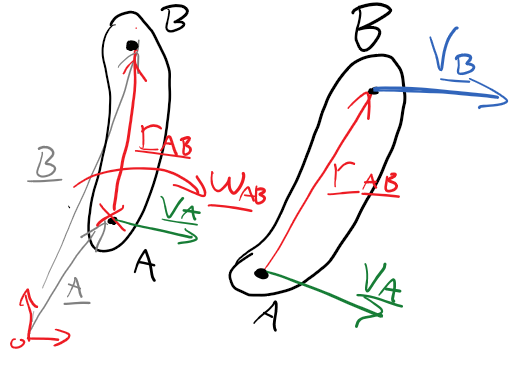

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{V_B} = \overrightarrow{V_A}+\overrightarrow{\omega}\times \overrightarrow{r_{AB}}$, (4)

Donde $\overrightarrow{\omega}$ es el vector de velocidad angular de la barra analizada.

Usualmente no tenemos el valor de $\overrightarrow{\omega}$, ya que las componentes escalares de esta son

$\overrightarrow{\omega} = \begin{bmatrix}
0 & 0 & \dot{\theta} 
\end{bmatrix}$ (5)

siendo $\dot{\theta}$ la magnitud de la velocidad angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de posición escalares, obtenidas a partir de las ecuaciones de cierre vectorial.

### Velocidad de la barra de entrada

Si la barra analizada es una barra de entrada, la derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d} \theta}{\mathrm{d} t} = \dot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d} r}{\mathrm{d} t} = \dot{r}$

### Derivadas de las ecuaciones de cierre vectorial

Derivando (1) y (2) con respecto al tiempo tenemos

$-r_2sin(\theta_{2})\dot{\theta_{2}} - r_3sin(\theta_{3})\dot{\theta_{3}} + r_4sin(\theta_{4})\dot{\theta_{4}}=0$, (6)

$r_2cos(\theta_{2})\dot{\theta_{2}} + r_3cos(\theta_{3})\dot{\theta_{3}} - r_4cos(\theta_{4})\dot{\theta_{4}}=0$. (7)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

$A = \begin{bmatrix}
- r_3sin(\theta_{3}) & r_4sin(\theta_{4})\\ 
r_3cos(\theta_{3}) & - r_4cos(\theta_{4})
\end{bmatrix}$,

$x = \begin{bmatrix}
\dot{\theta_{3}}\\ 
\dot{\theta_{4}}
\end{bmatrix}$ y

$b = \begin{bmatrix}
r_2sin(\theta_{2})\dot{\theta_{2}}\\ 
-r_2cos(\theta_{2})\dot{\theta_{2}}
\end{bmatrix}$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\dot{\theta_2}$. Vamos a asumir en este caso que la manivela rota a 60 rev/m, i.e., 1 rev/s

In [38]:
th2p = 2*np.pi # velocidad en radianes por segundo

### Solución del sistema de ecuaciones lineal

Usaremos la función solve del módulo numpy.linalg. Descomente la siguiente línea para revisar la ayuda

In [39]:
# help(np.linalg.solve)
# dir(np.linalg)

Hagámoslo para una sola posición inicialmente

In [65]:
pos = 15 #posicion 15 de numpos posiciones
th2 = th2v[pos]
th3 = th3v[pos]
th4 = th4v[pos]
print("theta2= ",np.rad2deg(th2),"theta3= ",np.rad2deg(th3),"theta4= ",np.rad2deg(th4))

am = [[-r3*np.sin(th3),r4*np.sin(th4)],
      [r3*np.cos(th3),-r4*np.cos(th4)]]
bv = [r2*np.sin(th2)*th2p,
      -r2*np.cos(th2)*th2p]
print(am,bv)
[th3p,th4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print("Theta_3p = ",np.rad2deg(th3p),"Theta_4p = ",np.rad2deg(th4p))

theta2=  15.04178272980501 theta3=  32.931133799917404 theta4=  76.20616422535915
[[-81.54459127835875, 97.11599371565966], [125.89868797269263, -23.842897571812752]] [97.8380070095356, -364.07420639217054]
Theta_3p =  -184.01867930120918 Theta_4p =  -96.79171013895522


## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Para esto necesitaremos las gráficas de posición de las variables secundarias respecto a la de entrada

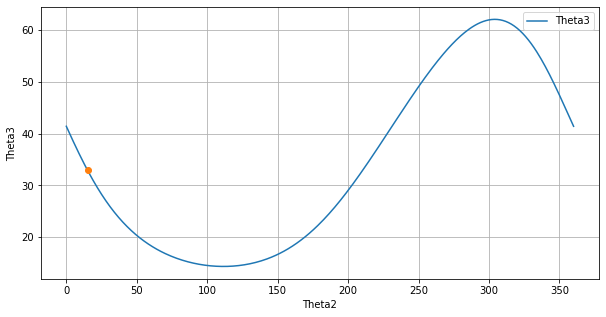

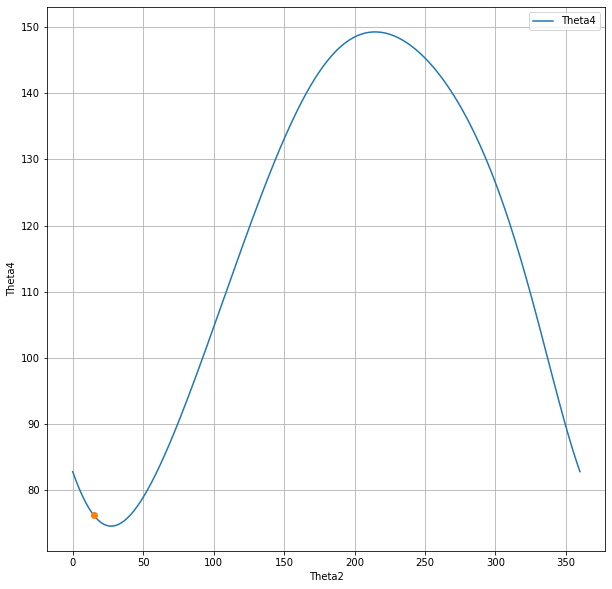

In [41]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th3v[pos]),'o')
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend(["Theta4"])
plt.xlabel("Theta2")
plt.ylabel("Theta4")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th4v[pos]),'o')
plt.grid()

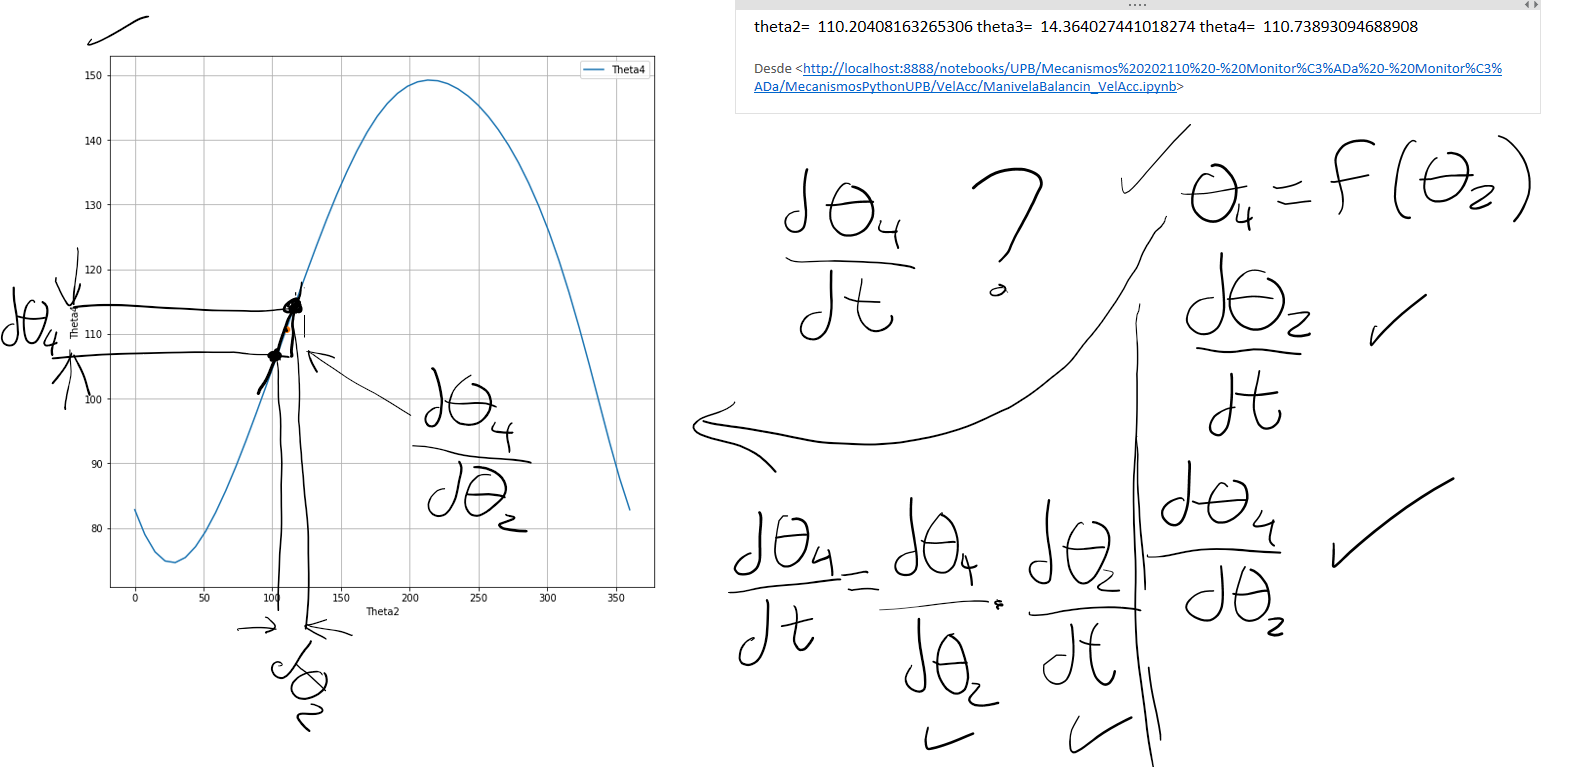

Tips para presentar mejor las gráficas: https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d#:~:text=By%20default%2C%20the%20size%20of,images%20have%20even%20smaller%20dimensions.

In [42]:
difth3 = (th3v[pos+1]-th3v[pos-1])
difth2 = (th2v[pos+1]-th2v[pos-1])
dth3_th2 = difth3/difth2
difth4 = (th4v[pos+1]-th4v[pos-1])
dth4_th2 = difth4/difth2
#print(difth4)
th3pNum = dth3_th2 * th2p
th4pNum = dth4_th2 * th2p
print(th3p,th3pNum)
print(th4p,th4pNum)

-3.2117318389776384 -3.2115318073332846
-1.6893340305607467 -1.6894149425701224


## Análisis de aceleración

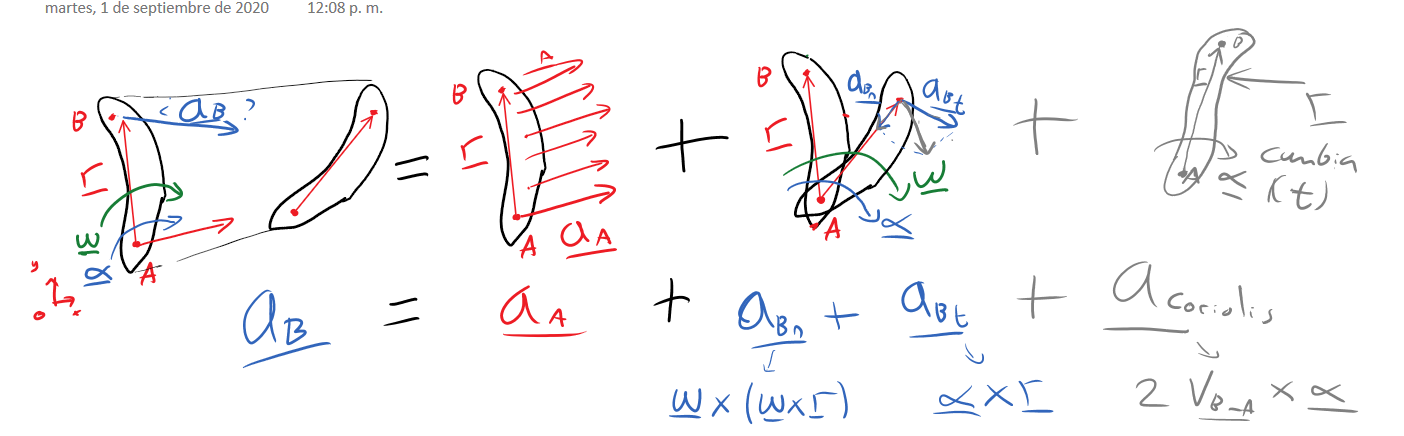

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{a_B} = \overrightarrow{a_A}+\overrightarrow{a_{B_n}} + \overrightarrow{a_{B_t}} + \overrightarrow{a_{coriolis}}$, (8)

donde $\overrightarrow{a_{B_n}} = \overrightarrow{\omega}\times (\overrightarrow{\omega}\times\overrightarrow{r_{AB}})$, 

$\overrightarrow{a_{B_t}} = \overrightarrow{\alpha}\times \overrightarrow{r_{AB}}$ y

$\overrightarrow{a_{coriolis}} = 2\overrightarrow{V_{B-A}}\times\overrightarrow{\alpha}$.

De lo anterior, $\overrightarrow{\alpha}$ es el vector de aceleración angular del cuerpo, la componente $\overrightarrow{V_{B-A}}$ aparece si el punto $B$ se mueve con respecto al punto $A$.

Procedemos de manera similar al análisis de velocidad:

Usualmente no tenemos el valor de $\overrightarrow{\alpha}$, ya que las componentes escalares de esta son

$\overrightarrow{\alpha} = \begin{bmatrix}
0 & 0 & \ddot{\theta} 
\end{bmatrix}$ (9)

siendo $\ddot{\theta}$ la magnitud de la aceleración angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de velocidad (6) y (7).

### Aceleración de la barra de entrada

Si la barra analizada es una barra de entrada, la segunda derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d^2} \theta}{\mathrm{d} t^2} = \ddot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d^2} r}{\mathrm{d} t^2} = \ddot{r}$

### Sympy: matemáticas simbólicas

Utilizaremos este módulo para realizar las derivadas simbólicas. Importamos el módulo básico y uno adicional para simplificar la notación de Newton

In [43]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

sym.init_printing(use_unicode=False, wrap_line=True)
init_vprinting()

Ahora definimos el tiempo como variable independiente, luego todas las demás variables dependientes del tiempo

In [44]:
t = sym.Symbol('t')
r2s = sym.Symbol('r_2')
r3s = sym.Symbol('r_3')
r4s = sym.Symbol('r_4')
th2s, th3s, th4s = sym.symbols('theta_2 theta_3 theta_4', cls=sym.Function)
th2sp = sym.diff(th2s(t),t)
th3sp = sym.diff(th3s(t),t)
th4sp = sym.diff(th4s(t),t)
th2spp = sym.diff(th2s(t),t,t)
th3spp = sym.diff(th3s(t),t,t)
th4spp = sym.diff(th4s(t),t,t)

Luego derivamos cada una de las expresiones de las ecuaciones (6) y (7) con respecto a t

In [45]:
a1 = sym.diff( r2s*sym.sin(th2s(t))*th2sp ,t)
b1 = sym.diff( r3s*sym.sin(th3s(t))*th3sp ,t)
c1 = sym.diff( r4s*sym.sin(th4s(t))*th4sp ,t)
a2 = sym.diff( r2s*sym.cos(th2s(t))*th2sp ,t)
b2 = sym.diff( r3s*sym.cos(th3s(t))*th3sp ,t)
c2 = sym.diff( r4s*sym.cos(th4s(t))*th4sp ,t)

### Derivadas de las ecuaciones de velocidad

Derivando (6) y (7) con respecto al tiempo usando el módulo de matemáticas simbólicas sympy, tenemos

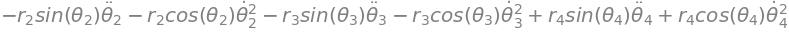

In [46]:
eq1 = -a1-b1+c1
eq1

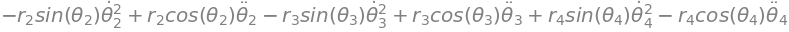

In [47]:
eq2 = a2+b2-c2
eq2

Al hacer clic derecho sobre las ecuaciones resultantes, se puede copiar el código TeX para usarlo abajo.

$-r_{2} \sin{\left(\theta_{2} \right)} \ddot{\theta}_{2} - r_{2} \cos{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2} - r_{3} \sin{\left(\theta_{3} \right)} \ddot{\theta}_{3} - r_{3} \cos{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} + r_{4} \sin{\left(\theta_{4} \right)} \ddot{\theta}_{4} + r_{4} \cos{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2}=0$, (10)

$- r_{2} \sin{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2} + r_{2} \cos{\left(\theta_{2} \right)} \ddot{\theta}_{2} - r_{3} \sin{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} + r_{3} \cos{\left(\theta_{3} \right)} \ddot{\theta}_{3} + r_{4} \sin{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2} - r_{4} \cos{\left(\theta_{4} \right)} \ddot{\theta}_{4}=0$. (11)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

In [48]:
#eqns = [eq1,eq2]
#As, bs = sym.linear_eq_to_matrix(eqns, [th3spp,th4spp])

$A = \begin{bmatrix}
- r_3sin(\theta_{3}) & r_4sin(\theta_{4})\\ 
r_3cos(\theta_{3}) & - r_4cos(\theta_{4})
\end{bmatrix}$,

$x = \begin{bmatrix}
\ddot{\theta_{3}}\\ 
\ddot{\theta_{4}}
\end{bmatrix}$ y

$b = \begin{bmatrix}
r_{2} \sin{\left(\theta_{2} \right)} \ddot{\theta}_{2} + r_{2} \cos{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2}
+ r_{3} \cos{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} -
r_{4} \cos{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2}\\ 
r_{2} \sin{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2} - r_{2} \cos{\left(\theta_{2} \right)} \ddot{\theta}_{2} 
+ r_{3} \sin{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} - r_{4} \sin{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2}
\end{bmatrix}$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\ddot{\theta_2}$. Como anteriormente asumimos una velocidad angular constante para la barra de entrada, $\ddot{\theta_2} = 0$. Simplificando

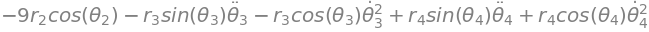

In [49]:
sym.simplify(eq1.subs(th2sp,3))

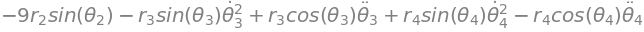

In [50]:
sym.simplify(eq2.subs(th2sp,3))

### Solución del sistema lineal

El método de solución es el mismo utilizado para hallar la velocidad. Revisar procedimiento en la parte superior

In [51]:
# La matriz A fue definida en el cálculo de la velocidad y es la misma
bv = [r2*np.cos(th2)*th2p**2 + r3*np.cos(th3)*th3p**2 - r4*np.cos(th4)*th4p**2,
      r2*np.sin(th2)*th2p**2 + r3*np.sin(th3)*th3p**2 - r4*np.sin(th4)*th4p**2]
xv = np.linalg.solve(am,bv) # el resultado de solve es el vector x
th3pp = xv[0]
th4pp = xv[1]

## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Se procede de manera similar que con la verificación numérica para la velocidad. Sin embargo, tener precaución con aplicar regla de la cadena a una segunda derivada:

https://www.quora.com/What-is-the-chain-rule-of-second-derivative


## Velocidad de un punto

Ahora si podemos usar la ecuación de velocidad de un punto de cualquier barra (4). 

Primero definamos los puntos que vamos a analizar:

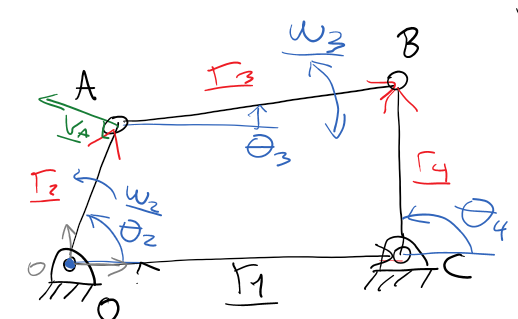

Ahora definamos cada elemento:

In [52]:
w2v = [0,0,th2p]
r2v = [r2*np.cos(th2),r2*np.sin(th2),0]
velA = np.cross(w2v,r2v)
print(velA)

[-97.83800701 364.07420639   0.        ]


El vector $\overrightarrow{V_A}$ tiene las componentes de la velocidad del punto A en mm/s

Ahora para calcular $\overrightarrow{V_B}$

In [53]:
w3v = [0,0,th3p]
r3v = [r3*np.cos(th3),r3*np.sin(th3),0]
velB = velA + np.cross(w3v,r3v)
print(velB)

[164.0613531  -40.27861826   0.        ]


In [54]:
#help(plt.quiver)

## Aceleración de un punto

Ahora si podemos usar la ecuación de aceleración de un punto de cualquier barra (8). 

Primero definamos los puntos que vamos a analizar:

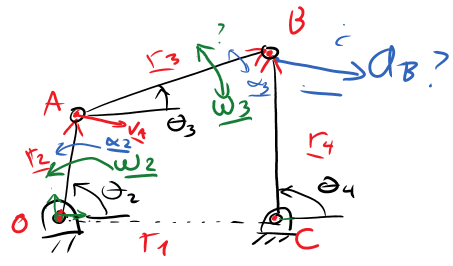

Ahora definamos los elementos que faltan:

In [55]:
# lo que ya tenemos
print(r2v,w2v,r3v,w3v)
aAv = np.cross(w2v,np.cross(w2v,r2v))
aBnv = np.cross(w3v,np.cross(w3v,r3v))
alpha3 = [0,0,th3pp]
aBtv = np.cross(alpha3,r3v)
aBv = aAv + aBnv + aBtv
aBtv

[57.944209599572865, 15.571402437827096, 0] [0, 0, 6.283185307179586] [125.89868797269263, 81.54459127835875, 0] [0, 0, -3.2117318389776384]


array([-1573.05305634,  2428.67506967,     0.        ])

## Graficar vectores de velocidad y aceleración

**nota sobre uso de plt.quiver:**
- scale_units='xy', para que el tamaño se ajuste en ambos ejes
- scale=4, cambia la escala para que las flechas quepan en el gráfico, a mayor el número, menor la escala
- color=(0,0,1,1), (Red,Green,Blue,alfa), tupla con valores de 0 a 1. Alfa es la transparencia de la flecha.

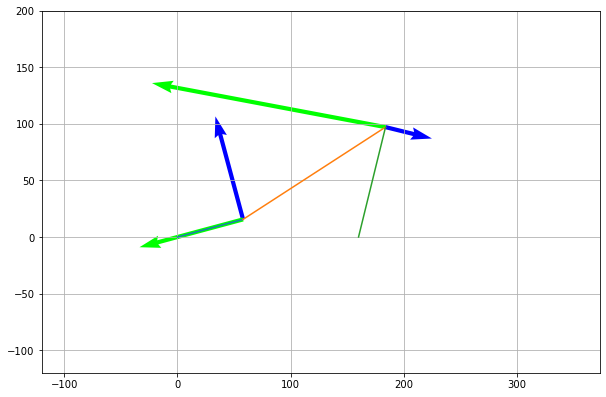

In [56]:
# ## Ubicación de puntos para animación
Ox = 0
Oy = 0
Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax + r3*np.cos(th3v)
By = Ay + r3*np.sin(th3v)
Cx = r1*np.cos(th1)
Cy = r1*np.sin(th1)

# ## Preparación de animación
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
hr2 = plt.plot([Ox,Ax[pos]],[Oy,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])
hr4 = plt.plot([Cx,Bx[pos]],[Cy,By[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velA[0], velA[1],
                 scale_units='xy', scale=4, color=(0,0,1,1))
hVB = plt.quiver(Bx[pos], By[pos], velB[0], velB[1],
                 scale_units='xy', scale=4, color=(0,0,1,1))
haA = plt.quiver(Ax[pos], Ay[pos], aAv[0], aAv[1],
                 scale_units='xy', scale=25, color=(0,1,0,1))
haB = plt.quiver(Bx[pos], By[pos], aBv[0], aBv[1],
                 scale_units='xy', scale=25, color=(0,1,0,1))
# haBn = plt.quiver(Bx[pos], By[pos], aBnv[0], aBnv[1],
#                  scale_units='xy', scale=25, color=(1,0,0,0.5))
# haBt = plt.quiver(Bx[pos], By[pos], aBtv[0], aBtv[1],
#                  scale_units='xy', scale=25, color=(1,0,0,0.5))
# haA2 = plt.quiver(Bx[pos], By[pos], aAv[0], aAv[1],
#                  scale_units='xy', scale=25, color=(1,0,0,0.5))

plt.axis("scaled")
plt.xlim(-r2*2,np.amax(Bx)*2)
plt.ylim(-r2*2,r4*2)
plt.grid()
plt.draw() 

## Análisis de velocidad y aceleración para un rango de valores



In [57]:
#Velocidad analitica
th3pv=np.zeros(numpos)
th4pv=np.zeros(numpos)
th3ppv=np.zeros(numpos)
th4ppv=np.zeros(numpos)
velAm=np.zeros((numpos,3))
velBm=np.zeros((numpos,3))
aAm=np.zeros((numpos,3))
aBm=np.zeros((numpos,3))
#print(aAm)
for i in range(0,numpos):
    # velocidad
    am = [[-r3*np.sin(th3v[i]),r4*np.sin(th4v[i])],
         [r3*np.cos(th3v[i]),-r4*np.cos(th4v[i])]]
    bv = [r2*np.sin(th2v[i])*th2p,
         -r2*np.cos(th2v[i])*th2p]
    xv = np.linalg.solve(am,bv)
    th3pv[i] = xv[0]
    th4pv[i] = xv[1]
    
    # aceleración
    #am se mantiene
    bv = [r2*np.cos(th2v[i])*th2p**2 + r3*np.cos(th3v[i])*th3pv[i]**2 - r4*np.cos(th4v[i])*th4pv[i]**2,
          r2*np.sin(th2v[i])*th2p**2 + r3*np.sin(th3v[i])*th3pv[i]**2 - r4*np.sin(th4v[i])*th4pv[i]**2]
    xv = np.linalg.solve(am,bv) # el resultado de solve es el vector x
    th3ppv[i] = xv[0]
    th4ppv[i] = xv[1]
    
    # velocidad de puntos
    w2v = [0,0,th2p]
    r2v = [r2*np.cos(th2v[i]),r2*np.sin(th2v[i]),0]
    velA = np.cross(w2v,r2v)
    #print(velA)
    w3v = [0,0,th3pv[i]]
    r3v = [r3*np.cos(th3v[i]),r3*np.sin(th3v[i]),0]
    velB = velA + np.cross(w3v,r3v)
    #print(velB)
    velAm[i,:] = velA
    velBm[i,:] = velB
    
    # aceleración de puntos
    aAm[i,:] = np.cross(w2v,np.cross(w2v,r2v))
    aBnv = np.cross(w3v,np.cross(w3v,r3v))
    alpha3 = [0,0,th3pp]
    aBtv = np.cross(alpha3,r3v)
    aBm[i,:] = aAv + aBnv + aBtv
    
    
    
th3pNumv=np.gradient(th3v,th2v)*th2p
th4pNumv=np.gradient(th4v,th2v)*th2p

# el segundo término de esta derivada se hace cero por th2pp = 0
th3ppNumv=np.gradient(np.gradient(th3v,th2v),th2v)*th2p**2
th4ppNumv=np.gradient(np.gradient(th4v,th2v),th2v)*th2p**2

print(th4ppv,th4ppNumv)

[ 4.29737452e+01  4.43828206e+01  4.56881640e+01  4.68854341e+01
  4.79711656e+01  4.89427865e+01  4.97986220e+01  5.05378835e+01
  5.11606448e+01  5.16678060e+01  5.20610470e+01  5.23427713e+01
  5.25160423e+01  5.25845146e+01  5.25523600e+01  5.24241926e+01
  5.22049922e+01  5.19000291e+01  5.15147911e+01  5.10549135e+01
  5.05261137e+01  4.99341303e+01  4.92846684e+01  4.85833501e+01
  4.78356716e+01  4.70469660e+01  4.62223721e+01  4.53668091e+01
  4.44849565e+01  4.35812394e+01  4.26598180e+01  4.17245817e+01
  4.07791462e+01  3.98268550e+01  3.88707828e+01  3.79137411e+01
  3.69582865e+01  3.60067303e+01  3.50611487e+01  3.41233951e+01
  3.31951114e+01  3.22777416e+01  3.13725438e+01  3.04806035e+01
  2.96028456e+01  2.87400476e+01  2.78928506e+01  2.70617716e+01
  2.62472140e+01  2.54494782e+01  2.46687715e+01  2.39052174e+01
  2.31588639e+01  2.24296922e+01  2.17176236e+01  2.10225270e+01
  2.03442246e+01  1.96824983e+01  1.90370948e+01  1.84077305e+01
  1.77940961e+01  1.71958

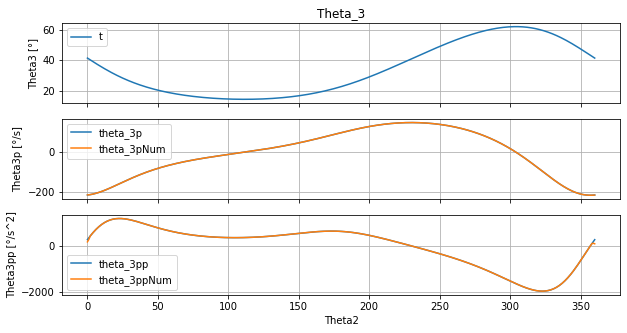

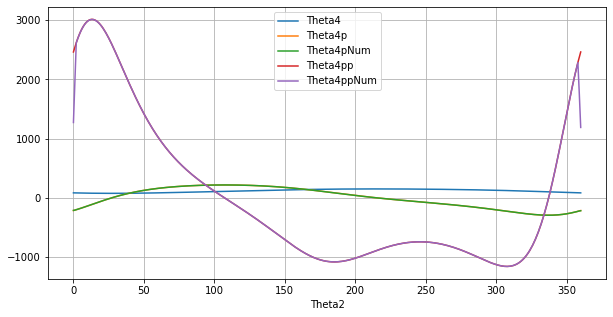

In [58]:
#con subplots

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(np.rad2deg(th2v),np.rad2deg(th3v))
ax1.set_title('Theta_3')
ax1.grid()
ax1.legend("theta_3")
ax1.set_ylabel("Theta3 [°]")
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
ax2.grid()
ax2.legend(["theta_3p","theta_3pNum"])
ax2.set_ylabel("Theta3p [°/s]")
ax3.plot(np.rad2deg(th2v),np.rad2deg(th3ppv))
ax3.plot(np.rad2deg(th2v),np.rad2deg(th3ppNumv))
ax3.grid()
ax3.legend(["theta_3pp","theta_3ppNum"])
ax3.set_xlabel("Theta2")
ax3.set_ylabel("Theta3pp [°/s^2]")

#con una sola figura
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pNumv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4ppv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4ppNumv))
plt.legend(["Theta4","Theta4p","Theta4pNum","Theta4pp","Theta4ppNum"])
plt.xlabel("Theta2")
#plt.ylabel("Theta4")
plt.grid()

In [59]:
# ## Animación
# 
# Definimos la función que dibuja cada cuadro (plot)

# In[177]:
from matplotlib.animation import FuncAnimation

def animar(i):
    manivelaX = np.array([Ox,Ax[i]])
    manivelaY = np.array([Oy,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    balancinX = np.array([Cx,Bx[i]])
    balancinY = np.array([Cy,By[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)
    hVA.set_offsets([Ax[i], Ay[i]])
    hVA.set_UVC(velAm[i,0],velAm[i,1])
    hVB.set_offsets([Bx[i], By[i]])
    hVB.set_UVC(velBm[i,0],velBm[i,1])
    haA.set_offsets([Ax[i], Ay[i]])
    haA.set_UVC(aAm[i,0],aAm[i,1])
    haB.set_offsets([Bx[i], By[i]])
    haB.set_UVC(aBm[i,0],aBm[i,1])
    
    return hr2[0],hr3[0],hr4[0],hVA,hVB,haA,haB,

videoLength = 5000 # en milisegundos
maxFrames = 80

increment = int(np.ceil(numpos/maxFrames))
totalFrames = range(0,numpos,increment)
animacion = FuncAnimation(fig, 
                          animar, 
                          frames = totalFrames,
                          interval=videoLength/len(totalFrames),
                          save_count=len(totalFrames),
                          blit=True)

#En Jupyter se pueden mostrar las animaciones directamente en el cuaderno
from IPython.display import HTML

# Comentar para reducir tamaño del cuaderno, generar animación en formato gif o mp4, requiere instalar ffmpeg
#animacion.save('animation.mp4', writer='ffmpeg', fps=15)
HTML(animacion.to_jshtml())